# Facial Keypoints Detection

### Let's Try to undestand Our Data
#### We have Three CSV File:
* training.csv :- It has Cordinates all facial points and image of that person
* test.csv     :- It has only images
* IdLookupTable.csv:- 

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
from sklearn.model_selection import train_test_split

In [2]:
#Getting Data Directory
Train_Dir = 'training.csv'
Test_Dir = 'test.csv'
lookid_dir = 'IdLookupTable.csv'

In [3]:
#Data in Pandas DatFrame
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)

In [4]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


### Let's plot first Image with cordinates to visulize our data

In [5]:
#Getting size of each image array
len(train_data['Image'][0].split(' '))

9216

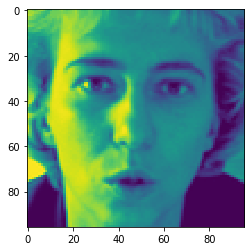

In [6]:
#Getting Sample Image
Image=train_data['Image'][1]
Image=Image.split(' ')
Image=np.array(Image,dtype='float')
Image=Image.reshape(96,96)
plt.imshow(Image)

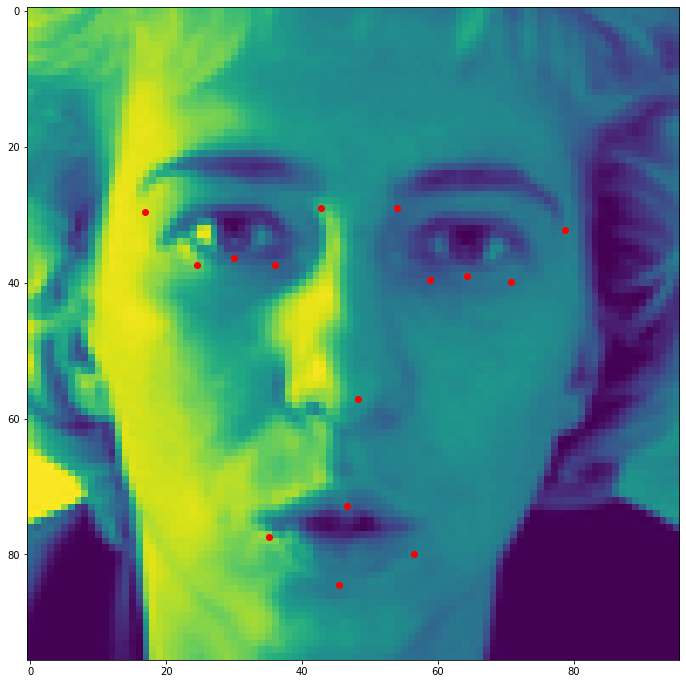

In [7]:
#Getting X Cordinates
x_cordinates=train_data.iloc[1][::2]
x_cordinates=x_cordinates.drop('Image')
x_cordinates=np.array(x_cordinates,dtype='float')

#Getting Y Cordinate
y_cordinates=train_data.iloc[0][1::2]
y_cordinates=np.array(y_cordinates,dtype='float')

plt.figure(figsize=(12,12))
plt.imshow(Image)
plt.scatter(x_cordinates,y_cordinates,color='red')

## We have lots of Nan Values( approx 4778 out of 7049) so we should drop it instead of filling it

In [8]:
train_data=train_data.dropna(axis=0)

In [9]:
#Splitting train and label
X=train_data['Image']
Y=train_data.drop(['Image'],axis=1)

In [10]:
#Converting String images into numpy array
temp_X=[]
for i in X:
    img=i.split(' ')
    numpy_img=np.array(img,dtype='float')
    reshaped_img=numpy_img.reshape(96,96,1)
    temp_X.append(reshaped_img)
    

In [11]:
X=np.array(temp_X)

### Train Test Split

In [12]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=.2)

## Building Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense,Dropout,Conv2D,AveragePooling2D,LeakyReLU,BatchNormalization

In [14]:
# # Le Net
# model = Sequential()

# model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(96,96,1)))
# model.add(AveragePooling2D())
# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# model.add(AveragePooling2D())
# model.add(Flatten())

# model.add(Dense(units=120, activation='relu'))
# model.add(Dense(units=84, activation='relu'))

# model.add(Dense(units=30, activation = 'softmax'))



# print(model.summary())
model = Sequential()

model.add(Convolution2D(8, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(8, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(16, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 8)         72        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 8)         32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 8)         576       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 8)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 8)         32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 8)         0

In [15]:
#Optimizer
import tensorflow as tf 
optimiser= tf.keras.optimizers.Adam()

In [16]:
#Compiling Model
model.compile(optimizer = optimiser ,loss= 'mse', metrics = ['mae'] )

In [19]:
model.fit(X_train,Y_train,batch_size=32,epochs=5,validation_data=(X_valid,Y_valid))

Train on 1712 samples, validate on 428 samples
Epoch 1/5
1712/1712 [==============================] - 17s 10ms/sample - loss: 22.2580 - mae: 3.6745 - val_loss: 7.9450 - val_mae: 2.0647

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618
2278,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156
2281,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522
2282,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,54.075935,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543


In [46]:
array=model.predict(X_valid[7].reshape(1,96,96,1))
array

array([[64.50832 , 36.37759 , 30.561018, 36.99963 , 59.608982, 37.631165,
        72.99878 , 36.820568, 36.63771 , 36.76239 , 23.323015, 37.05349 ,
        57.294838, 28.174215, 77.55314 , 28.265093, 38.88893 , 27.93285 ,
        17.784924, 29.692373, 48.551727, 54.555195, 63.415943, 70.84531 ,
        33.629436, 70.934586, 47.344376, 66.99436 , 49.01736 , 79.21712 ]],
      dtype=float32)

In [47]:
X_c=array[0][::2]
Y_c=array[0][1::2]

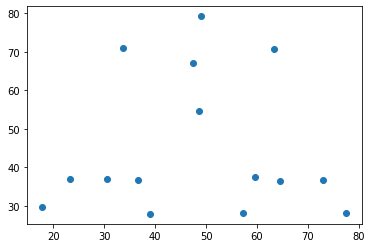

In [48]:
plt.scatter(X_c,Y_c)

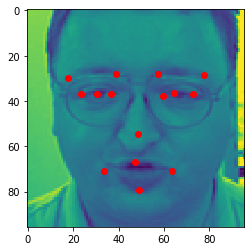

In [49]:
plt.imshow(X_valid[7].reshape(96,96))
plt.scatter(X_c,Y_c,color='r')

## Prediction on test Data

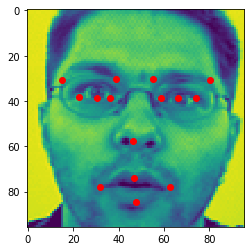

In [50]:

t=np.array(test_data['Image'][10].split(' '),dtype='float')
t=t.reshape(1,96,96,1)
plt.imshow(t.reshape(96,96))
arr=model.predict(t)
X_c=arr[0][::2]
Y_c=arr[0][1::2]
plt.scatter(X_c,Y_c,color='r')

In [291]:
model.save('predictions.h5')

In [54]:
import cv2
def upload_image(path):
    img=np.array(cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(96,96))).reshape(1,96,96,1)
    predictions=model.predict(img)
    X_c=predictions[0][::2]
    Y_c=predictions[0][1::2]
    plt.imshow(img.reshape(96,96))
    plt.scatter(X_c,Y_c,color='red')

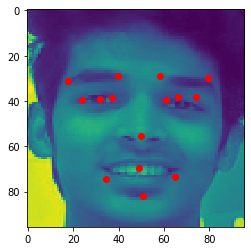

In [55]:
upload_image('test.jpg')